In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка даннных

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

## Первый взгляд

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Визуальный анализ

#### Вопрос 1. Каково соотношение выживших и погибших пассажиров?

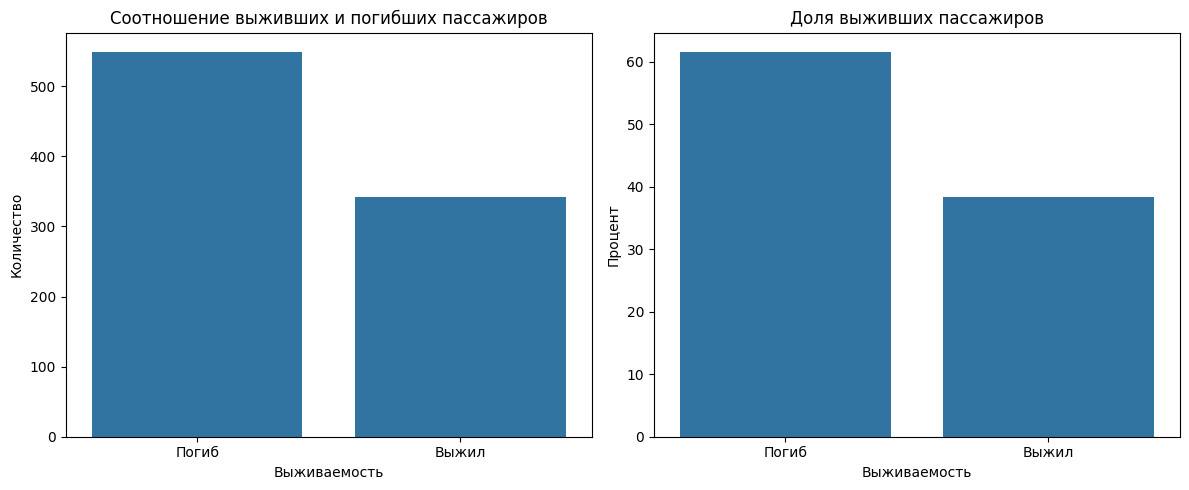

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='Survived',data=data)
plt.title('Соотношение выживших и погибших пассажиров')
plt.xlabel('Выживаемость')
plt.ylabel('Количество')
plt.xticks([0,1],['Погиб','Выжил'])
plt.subplot(1,2,2)
percent_data=(data['Survived'].value_counts(normalize=True).mul(100).rename('percent').reset_index())
sns.barplot(x='Survived',y='percent', data=percent_data)
plt.title('Доля выживших пассажиров')
plt.xlabel('Выживаемость')
plt.ylabel('Процент')
plt.xticks([0,1],['Погиб','Выжил'])
plt.tight_layout()
plt.show()

#### Вопрос 2. Как пол пассажиров влиял на выживаемость?

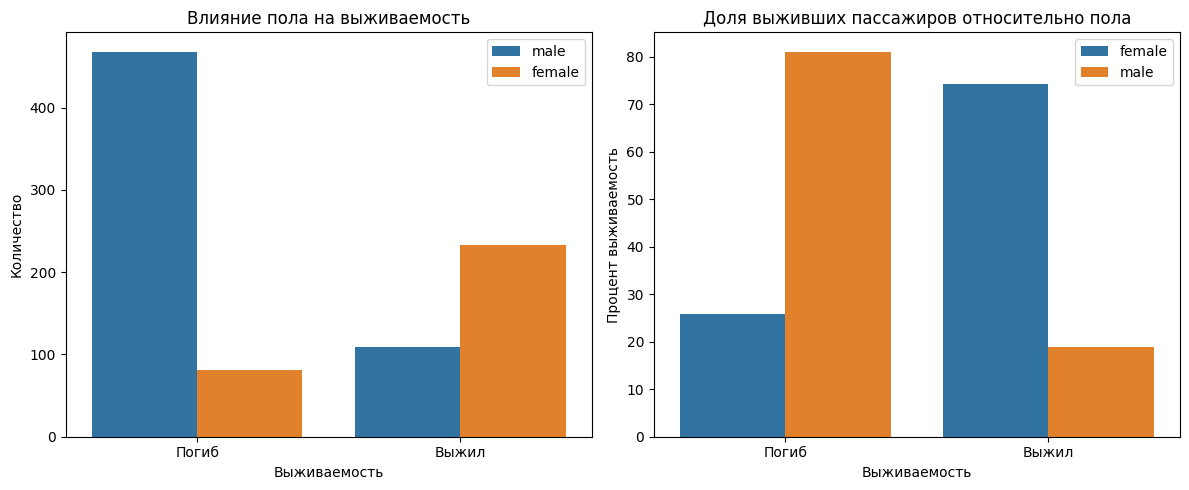

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='Survived',hue='Sex', data=data)
plt.title('Влияние пола на выживаемость')
plt.xticks([0,1],['Погиб','Выжил'])
plt.xlabel('Выживаемость')
plt.ylabel('Количество')
plt.legend()
plt.subplot(1,2,2)
percent_data=(data.groupby('Sex')['Survived'].value_counts(normalize=True).mul(100).rename('percent').reset_index())
sns.barplot(x='Survived',y='percent',hue='Sex', data=percent_data)
plt.title('Доля выживших пассажиров относительно пола')
plt.xlabel('Выживаемость')
plt.ylabel('Процент выживаемость')
plt.xticks([0,1],['Погиб','Выжил'])
plt.tight_layout()
plt.legend()
plt.show()

#### Вопрос 3. Как класс каюты влиял на выживаемость?

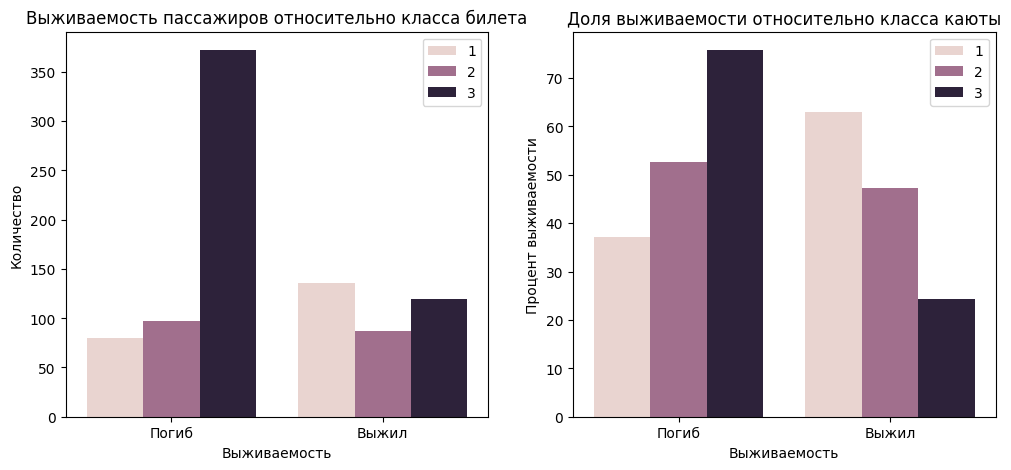

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='Survived',hue='Pclass',data=data)
plt.title('Выживаемость пассажиров относительно класса билета')
plt.xlabel('Выживаемость')
plt.ylabel('Количество')
plt.xticks([0,1],['Погиб','Выжил'])
plt.legend()
plt.subplot(1,2,2)
data_percent=(data.groupby('Pclass')['Survived'].value_counts(normalize=True).mul(100).rename('percent').reset_index())
sns.barplot(x='Survived',y='percent',hue='Pclass', data=data_percent)
plt.title('Доля выживаемости относительно класса каюты')
plt.xlabel('Выживаемость')
plt.ylabel('Процент выживаемости')
plt.xticks([0,1],['Погиб','Выжил'])
plt.legend()
plt.show()
